<a href="https://colab.research.google.com/github/juanqwerty773/labo-2/blob/main/segunda%20clase/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
!git clone https://github.com/juanqwerty773/labo-2.git
%cd labo-2
df = pd.read_csv("segunda clase/segundaClase(29_08) - Hoja 2.csv")
df.head()


Cloning into 'labo-2'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 78 (delta 25), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 515.60 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/labo-2/labo-2


,hertz_gf_(kHz),hertz_osci_emi_(kHz),hertz_osci_rec_(KHz),escala_emi_(V/div),escala_recp(mV/div),Vpp_emi_(V),Vpp_rec_(mV),desfasaje_(mus),promedio,error_Vpp_rec(mV)
0,"35,5","35,51",389,2,1,"9,9","2,5","3,6",16,"0,125"
1,"35,75","35,73",354,2,1,"9,845","2,424","5,6",16,"0,12272"
2,36,36,"64,71",2,1,"9,845","2,959","7,6",16,"0,13877"
3,"36,25","36,24","71,22",2,1,"9,887","4,062","9,6",16,"0,17186"
4,"36,5","36,51","36,014",2,1,"9,88","4,99","13,6",16,"0,1997"


In [6]:
tb = df

tb['hertz_osci_emi_(kHz)'] = tb['hertz_osci_emi_(kHz)'].str.replace(',', '.', regex=False)
tb['Vpp_rec_(mV)'] = tb['Vpp_rec_(mV)'].str.replace(',','.', regex=False)
tb['error_Vpp_rec(mV)'] = tb['error_Vpp_rec(mV)'].str.replace(',','.', regex=False)
tb['error_Vpp_rec(mV)'] = pd.to_numeric(tb['error_Vpp_rec(mV)'], errors='coerce')
tb['hertz_osci_emi_(kHz)'] = pd.to_numeric(tb['hertz_osci_emi_(kHz)'], errors='coerce')
tb['Vpp_rec_(mV)'] = pd.to_numeric(tb['Vpp_rec_(mV)'], errors='coerce')


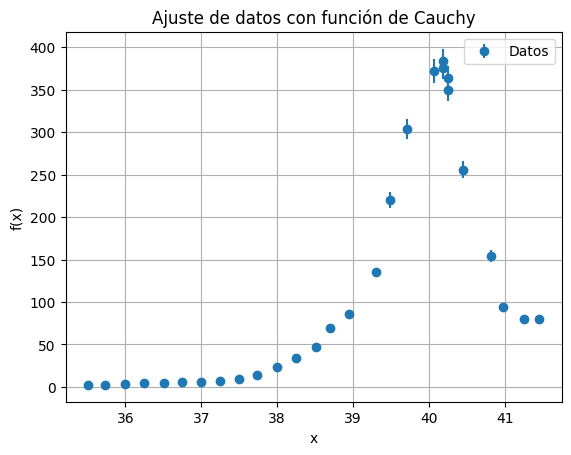

In [26]:
frecuencia = tb[ tb['hertz_osci_emi_(kHz)'] < 41.5 ]['hertz_osci_emi_(kHz)']
Vpp = tb[ tb['hertz_osci_emi_(kHz)'] < 41.5 ]['Vpp_rec_(mV)']
error_Vpp =tb[ tb['hertz_osci_emi_(kHz)'] < 41.5 ]['error_Vpp_rec(mV)']
plt.errorbar(frecuencia, Vpp, yerr=error_Vpp, fmt='o', label='Datos')

plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
frecuencia = tb[ tb['hertz_osci_emi_(kHz)'] >= 41.5 ]['hertz_osci_emi_(kHz)']
Vpp = tb[ tb['hertz_osci_emi_(kHz)'] >= 41.5 ]['Vpp_rec_(mV)']
error_Vpp =tb[ tb['hertz_osci_emi_(kHz)'] >= 41.5 ]['error_Vpp_rec(mV)']

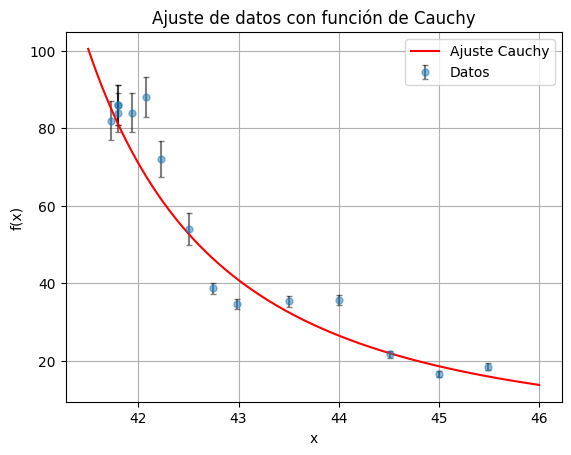

Parámetros ajustados:
 x0 = 38.867
 gamma = 0.013
 A = 170190.496


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ------------------------------
# Función de Cauchy (a ajustar)
def cauchy(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# ------------------------------
# Datos de ejemplo (simulados)
x_data = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data = Vpp
error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt, pcov = curve_fit(cauchy, x_data, y_data, sigma=error_y, absolute_sigma=True, maxfev=10000)
x0_fit, gamma_fit, A_fit = popt

# ------------------------------
# Graficar resultados
x_fit = np.linspace(41.5, 46, 1000)
y_fit = cauchy(x_fit, *popt)

plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Datos',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Cauchy')
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar parámetros ajustados
print(f'Parámetros ajustados:\n x0 = {x0_fit:.3f}\n gamma = {gamma_fit:.3f}\n A = {A_fit:.3f}')

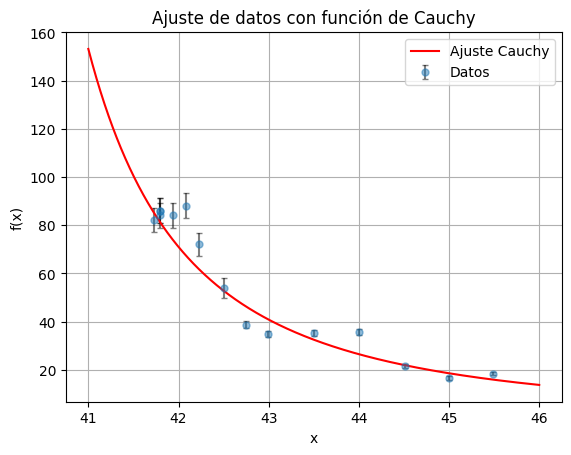

Parámetros ajustados:
 x0 = 38.867
 gamma = 0.013
 A = 170190.496


In [35]:
# ------------------------------
# Función de Cauchy (a ajustar)
def cauchy(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# ------------------------------
# Datos de ejemplo (simulados)
x_data = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data = Vpp
error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt, pcov = curve_fit(cauchy, x_data, y_data, sigma=error_y, absolute_sigma=True, maxfev=10000)
x0_fit, gamma_fit, A_fit = popt

# ------------------------------
# Graficar resultados
x_fit = np.linspace(41.5, 46, 1000)
y_fit = cauchy(x_fit, *popt)

plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Datos',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Cauchy')
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar parámetros ajustados
print(f'Parámetros ajustados:\n x0 = {x0_fit:.3f}\n gamma = {gamma_fit:.3f}\n A = {A_fit:.3f}')

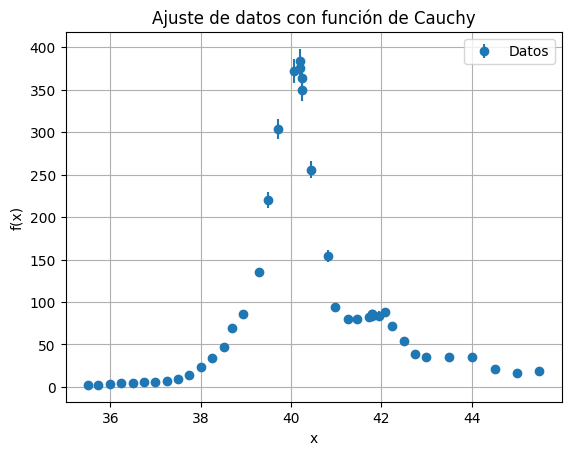

In [42]:
frecuencia = tb['hertz_osci_emi_(kHz)']
Vpp = tb['Vpp_rec_(mV)']
error_Vpp =tb['error_Vpp_rec(mV)']
plt.errorbar(frecuencia, Vpp, yerr=error_Vpp, fmt='o', label='Datos')

plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

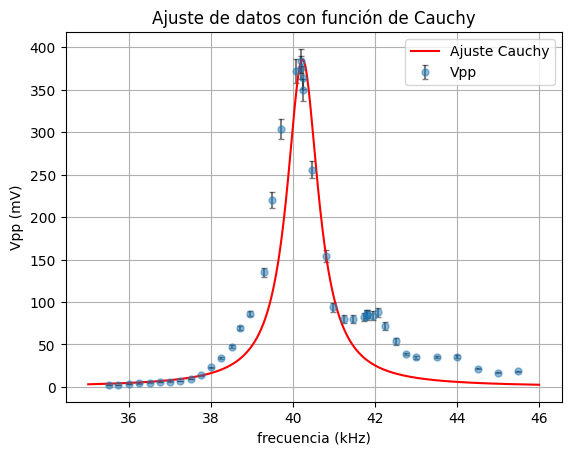

Parámetros ajustados:
 x0 = 40.230
 gamma = 0.468
 A = 566.758


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ------------------------------
# Función de Cauchy (a ajustar)
def cauchy(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# ------------------------------
# Datos de ejemplo (simulados)
x_data = frecuencia
#true_params = (0, 2, 10)  # x0, gamma, A
y_data = Vpp
error_y = error_Vpp  # errores constantes

# ------------------------------
# Ajuste con curve_fit
popt, pcov = curve_fit(cauchy, x_data, y_data, sigma=error_y, absolute_sigma=True)
x0_fit, gamma_fit, A_fit = popt

# ------------------------------
# Graficar resultados
x_fit = np.linspace(35, 46, 1000)
y_fit = cauchy(x_fit, *popt)

plt.errorbar(x_data, y_data, yerr=error_y, fmt='o', label='Vpp',ecolor='black',capsize=2,markersize= 5,alpha = 0.5)
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Cauchy')
plt.title('Ajuste de datos con función de Cauchy')
plt.xlabel('frecuencia (kHz)')
plt.ylabel('Vpp (mV)')
plt.legend()
plt.grid(True)
plt.savefig("cauchy_loretziana.png", dpi=300, bbox_inches='tight')
plt.show()

# Mostrar parámetros ajustados
print(f'Parámetros ajustados:\n x0 = {x0_fit:.3f}\n gamma = {gamma_fit:.3f}\n A = {A_fit:.3f}')

In [54]:
!cp "segunda clase/cauchy_loretziana.png"


cp: missing destination file operand after 'segunda clase/cauchy_loretziana.png'
Try 'cp --help' for more information.
